In [1]:
import numpy as np
import wurtzite as wzt
import wurtzite
import matplotlib.pyplot as plt
import matplotlib
from wurtzite.visualization import display_crystal_with_dislocations 

Utility functions:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Tuple, Optional
import dataclasses

def set_axes_off(ax):
    # Remove default axes and ticks
    ax.spines["left"].set_color("none")
    ax.spines["bottom"].set_color("none")
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    return ax


def display_axes_2d(ax, center: Tuple[float, float] = (0.0, 0.0), 
                    x_range: Tuple[float, float] = (-9.0, 9.0), 
                    y_range: Tuple[float, float] = (-9.0, 9.0), 
                    theta: float = 0.0, xlabel: Optional[str] = None, 
                    ylabel: Optional[str] = None,
                    fontsize=12, color="black", 
                    arrow_size=0.5,
                    **kwargs):
    """
    :param theta: coordinate system rotation angle [radians]
    """
    center = np.asarray(center).T
    x_left, x_right = x_range
    y_left, y_right = y_range        
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], 
                                [np.sin(theta), np.cos(theta)]])

    x_axis = np.array([[x_left, x_right],
                       [0,      0      ]])
    y_axis = np.array([[0,      0      ], 
                       [y_left, y_right]])

    transformed_ox = np.dot(rotation_matrix, x_axis)
    transformed_oy = np.dot(rotation_matrix, y_axis)

    ox_start_x, ox_start_y = transformed_ox[:, 0] + center
    ox_end_x, ox_end_y = transformed_ox[:, 1] + center

    oy_start_x, oy_start_y = transformed_oy[:, 0] + center
    oy_end_x, oy_end_y = transformed_oy[:, 1] + center
                        
    # OX (horizontal)
    ax.arrow(ox_start_x, ox_start_y, ox_end_x-ox_start_x, ox_end_y-ox_start_y, 
             head_width=arrow_size, head_length=arrow_size, fc=color, ec=color,
             **kwargs)
    ax.arrow(oy_start_x, oy_start_y, oy_end_x-oy_start_x, oy_end_y-oy_start_y, 
             head_width=arrow_size, head_length=arrow_size, fc=color, ec=color,
             **kwargs)
    if xlabel is not None:
        ax.annotate(xlabel, xy=(ox_end_x + 0.5, ox_end_y + 0.5), 
                    fontsize=fontsize, color=color)
    
    if ylabel is not None:
        ax.annotate(ylabel, xy=(oy_end_x + 0.5, oy_end_y + 0.5), 
                    fontsize=fontsize, color=color)
    return ax


def display_tee_2d(ax, d: wurtzite.model.DislocationDef, line_width=6, zorder=10000, scale=1.0, fontsize="medium",
                   label_offset: tuple = (0, -1)):
    line_width *= scale
    pos, b = np.asarray(d.position), np.asarray(d.b)*scale
    t_left_x, t_left_y = pos[:2] - b[:2]  # left
    t_center_x, t_center_y = pos[:2]  # center
    t_right_x, t_right_y = pos[:2] + b[:2]  # right
    # top (bv rotated by pi/2)
    bv_rotated = np.asarray([-b[1], b[0]])
    t_top_x, t_top_y = pos[:2] + bv_rotated  # top
    
    ax.plot([t_left_x, t_right_x], [t_left_y, t_right_y], color=d.color, lw=line_width, zorder=zorder)
    ax.plot([t_center_x, t_top_x], [t_center_y, t_top_y], color=d.color, lw=line_width, zorder=zorder)
    ax.text(d.position[0]+label_offset[0]*scale, d.position[1]+label_offset[1]*scale, d.label,  
            horizontalalignment="center", verticalalignment="center", 
            zorder=zorder, fontsize=fontsize)
    return ax


def display_vector_2d(ax, a, b, **kwargs):
    a_x, a_y = a
    b_x, b_y = b
    d_x, d_y = b_x-a_x, b_y-a_y
    ax.arrow(a_x, a_y, d_x, d_y, length_includes_head=True, **kwargs)
    return ax


def display_arc_2d(ax, center, radius, start_angle, end_angle, arrow_size=0.2, color="black", 
                   **kwargs):
    t = np.linspace(start_angle, end_angle, 100)
    arc_points = center + radius * np.array([np.cos(t), np.sin(t)]).T
    ax.plot(arc_points[:, 0], arc_points[:, 1], "b-", color=color, **kwargs)
    arrow_dx = arc_points[-1, 0] - arc_points[-2, 0]
    arrow_dy = arc_points[-1, 1] - arc_points[-2, 1]
    ax.arrow(arc_points[-2, 0], arc_points[-2, 1], 
             arrow_dx, arrow_dy, 
             head_width=arrow_size, head_length=arrow_size, fc=color, ec=color, color=color, 
             **kwargs)


def rot_matrix_2d(angle):
    return np.array([[np.cos(angle), -np.sin(angle)], 
                    [np.sin(angle), np.cos(angle)]])

# TEST

# plt.cla()
# fig, ax = plt.subplots()

# ax.set_xlim(-10, 10)
# ax.set_ylim(-10, 10)

# ax.set_aspect("equal")

# theta = 30/180*np.pi

# d1 = wzt.model.DislocationDef(
#     b=[1, 0, 0],
#     position=[0, 0, 0],
#     plane=(0, 0, 1),
#     label="d1",
#     color="deepskyblue"
# )

# rt = np.array([[np.cos(theta), -np.sin(theta)], 
#                [np.sin(theta), np.cos(theta)]])
# d1 = dataclasses.replace(d1, b=np.dot(rt, d1.b[:2]))

# set_axes_off(ax)
# display_axes_2d(ax, theta=theta, x_range=(-8, 8), y_range=(-8, 8), linestyle=":", lw=0.5, color="gray")

# # Rotate dislocation
# display_dislocation_2d(ax, d1)

In [3]:
NU = 0.35

def get_crystal_surface_oxy(position=(0, 0, 0), x0=0, y0=0, nx=2000, ny=2000, xlim=(-10, 10), ylim=(-1, 1), bx=1):
    def F(x, y, x0, y0, nu, bx, r0):
        return y-y0+bx/(8*np.pi*(1-nu))*((1-2*nu)*np.log((x**2 + y**2)/r0**2)-2*y**2/(x**2 +y**2)
                                    -(1-2*nu)*np.log((x0**2 + y0**2)/r0**2) +2*y0**2/(x0**2+y0**2))
    
    x = np.linspace(xlim[0], xlim[1], nx)
    y = np.linspace(ylim[0], ylim[1], ny)
    xy = np.meshgrid(x, y, indexing="ij")

    xy = np.stack(xy).reshape(2, -1)

    v = F(xy[0, :], xy[1, :], x0, y0, nu=NU, bx=bx, r0=bx)
    v = v.reshape(nx, ny)  # F(x, y)
    mask = np.argmin(np.abs(v), axis=1)
    ys = []
    for i in mask:
        ys.append(y[i])
    ys = np.stack(ys)
    x += position[0]
    ys += position[1]
    return (x, ys)

# Fig. 1: Planes

In [4]:
# fig, ax = plt.subplots()
# fig.set_size_inches((10, 10))

# xlim = -1.5, 1.5
# ylim = -0.6, 0.6

# for i in reversed([-0.5, -0.4, -0.3, -0.2, -0.1, -0.05, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]):
#     if not np.isclose(i, 0.0):
#         plane_d_x, plane_d_y = wzt.dislocations.get_crystal_surface_oxy(
#             position=(0, 0, 0), 
#             x0=0.0, 
#             y0=i, 
#             xlim=xlim, ylim=ylim, 
#             bx=1
#         )
#         ax.plot(plane_d_x, plane_d_y, label=f"$y_0$={round(i, 2)}")

# ax.set_xlim(xlim)
# ax.set_ylim(ylim)
# ax.set_xlabel("x[b]")
# ax.set_ylabel("y[b]")
# ax.grid(True)
# ax.legend(loc="right")
# ax.set_aspect("equal")

# Figure 2: Two dislocations

Powyzej pomaranczowej linii mamy -be/2, poniżej mamy be/2

Calkujac po 2pi mamy rowne sumie wektora burgersa (be)

Calkujemy po \Theta_d, ktore daje nam tak na prawde pole przemieszczen u (bo tak jest po prostu, wg wzorow Love'a)

Reading bond: 184/184

/tmp/ipykernel_57421/2918228557.py:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(arc_points[:, 0], arc_points[:, 1], "b-", color=color, **kwargs)
/tmp/ipykernel_57421/2918228557.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  ax.plot(arc_points[:, 0], arc_points[:, 1], "b-", color=color, **kwargs)


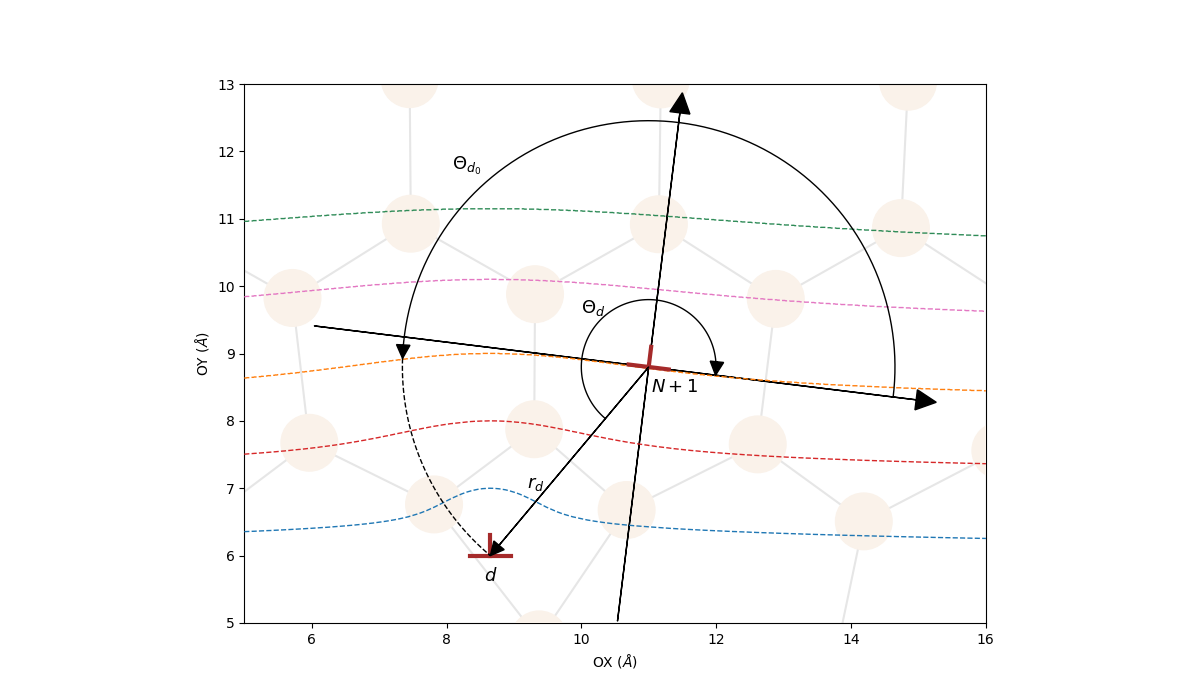

In [9]:
def display_arc_2d(ax, center, radius, start_angle, end_angle, arrow_size=0.2, color="black",
                   **kwargs):
    t = np.linspace(start_angle, end_angle, 100)
    arc_points = center + radius * np.array([np.cos(t), np.sin(t)]).T
    ax.plot(arc_points[:, 0], arc_points[:, 1], "b-", color=color, **kwargs)
    arrow_dx = arc_points[-1, 0] - arc_points[-2, 0]
    arrow_dy = arc_points[-1, 1] - arc_points[-2, 1]
    ax.arrow(arc_points[-2, 0], arc_points[-2, 1], 
             arrow_dx, arrow_dy, 
             head_width=arrow_size, head_length=arrow_size, fc=color, ec=color, color=color, 
             length_includes_head=True,
             **kwargs)


%matplotlib widget
l0 = wzt.generate.create_lattice(
    dimensions=(8, 5, 1),  #  The number of cells OX, OY, OZ
    cell="B4_ZnS",
)
fontsize = 13  # Tylko dla etykiet w srodku wykresu

d = wzt.model.DislocationDef(
    b=[1, 0, 0],
    position=[9, 6, 7.5],
    plane=(0, 0, 1),
    label="$d$",
    color="brown"
)

u0 = wzt.dislocations.displace_love(
    crystal=l0,
    position=d.position,
    burgers_vector=d.b,
    plane=d.plane,
    bv_fraction=1.0,
    tolerance=1e-6
)
l1 = l0.translate(u0)
l1 = wzt.generate.update_bonds(l1)

# WYSWIETLANIE ATOMOW
fig, ax = wzt.visualization.plot_atoms_2d(l1, alpha=0.1, offset=3)
ax.set_aspect("equal")

# WYMIARY OBRAZKA W CALACH
fig.set_size_inches((12, 7))

# TYTUŁ OBRAZKA
# ax.set_title("TITLE")

# ABY WYLACZYC OSIE NA BOKACH OBRAZKA
# set_axes_off(ax)

# ABY WYSWIETLIC PLASZCZYZNY PO PIERWSZEJ DYSLOKACJI
bv_angstrom = l0.cell.to_cartesian_indices(d.b)
xlim = -12, 15

offset = np.asarray([-0.35, 0.0, 0.0])  # TODO determine that by interpolating the initial location of the 
d_offseted = dataclasses.replace(d, position=d.position+offset)
for y0, ylim, color in [
        (1.0, (-1, 1), "tab:blue"), 
        (2.0, (0, 3.0), "tab:red"), 
        (3.0, (0, 10.0), "tab:orange"),
        (4.1, (0, 10.0), "tab:pink"),
        (5.15, (0, 10.0), "seagreen"),
        (-1.25, (-10.0, 0.0), "lightskyblue"),
        (-2.4, (-10.0, 0.0), "olive"),
]:
    plane_d_x, plane_d_y = get_crystal_surface_oxy(
        position=d_offseted.position, x0=0.0, y0=y0, xlim=xlim, ylim=ylim, bx=bv_angstrom[0])
    ax.plot(plane_d_x, plane_d_y, lw=1, ls="--", zorder=1500, color=color)

# ABY WYSWIETLIC TEOWNIK
display_tee_2d(ax, d_offseted, scale=0.3, line_width=10, fontsize=fontsize)

# ABY WYSWIETLIC ORIGIN UKLADU WSPOLRZEDNYCH PRZY WYZNACZANIU DYSLOKACJI
# plt.scatter(d1.position[0], d1.position[1], marker="x", s=100, c="red")

# DRUGA DYSLOKACJA
angle = -7/180*np.pi
bv_np1 = np.dot(rot_matrix_2d(angle), [1, 0])
bv_np1 = np.concatenate((bv_np1, [0]))
d_np1 = wzt.model.DislocationDef(
    b=bv_np1,
    position=[11.0, 8.8, 7.5],
    plane=(0, 0, 1),
    label="$N+1$",
    color="brown"
)

display_tee_2d(ax, d_np1, scale=0.3, line_width=10, fontsize=fontsize, label_offset=(1.3, -1))
display_axes_2d(ax, center=d_np1.position[:2], 
                theta=angle, 
                x_range=(-5, 4), y_range=(-3.8, 3.8), 
                linestyle="-", lw=1, color="black", zorder=1200,
                arrow_size=0.3,
                antialiased=True)

vector_arrow_size = 0.2
# WEKTOR z tetownika N+1 do tetownika d
display_vector_2d(ax, d_np1.position[:2], d_offseted.position[:2], zorder=10000, 
                  head_width=vector_arrow_size, head_length=vector_arrow_size,
                  color="black")
ax.text(d.position[0]+0.2, d.position[1]+1, "$r_d$", fontsize=fontsize)


# Luki
plane_angle_offset = 5/180*np.pi  # TODO calculate
theta_d0_arc_radius = np.hypot(*(d_offseted.position-d_np1.position)[:2])  # == |r_d|

# Theta_d0 arc
display_arc_2d(
    ax, center=(d_np1.position[:2]), radius=theta_d0_arc_radius, 
    start_angle=angle, end_angle=180/180*np.pi+angle+plane_angle_offset, 
    zorder=1500, lw=1.0, linestyle="-", arrow_size=0.2
)

ax.text(d_np1.position[0]-0.8*theta_d0_arc_radius, d_np1.position[1]+0.8*theta_d0_arc_radius, "$\Theta_{d_0}$", 
        fontsize=fontsize,
        zorder=1500)

display_arc_2d(
    ax, center=(d_np1.position[:2]), radius=theta_d0_arc_radius, 
    start_angle=180/180*np.pi+angle+plane_angle_offset, end_angle=180/180*np.pi+angle+plane_angle_offset+52/180*np.pi, 
    zorder=10000, lw=1.0, linestyle="--", arrow_size=0.0
)


# Theta_d arc
theta_d_arc_radius = 1.0
vector_angle_offset = 56/180*np.pi  # TODO calculate
display_arc_2d(ax, center=(d_np1.position[:2]), 
               radius=theta_d_arc_radius, 
               end_angle=angle, 
               start_angle=180/180*np.pi+angle+vector_angle_offset, 
               zorder=1500, lw=1.0, linestyle="-", 
               arrow_size=0.2
            )
ax.text(d_np1.position[0]-1*theta_d_arc_radius, 
        d_np1.position[1]+0.8*theta_d_arc_radius, 
        "$\Theta_d$", 
        fontsize=fontsize,
        zorder=1500)


# WYBIERZ OBSZAR OBRAZKA DO WYSWIETLENIA
ax.set_xlim([5, 16])
ax.set_ylim([5, 13])

# Zapisz do pliku o podanej nazwie 
fig.savefig('twodisl.eps', bbox_inches='tight', pad_inches=0)
fig.savefig("twodisl.svg", bbox_inches='tight', pad_inches=0)

# TO BE REMOVED

In [6]:
# plt.figure()
# plt.quiver(l0.coordinates[..., 0], l0.coordinates[..., 1], u[..., 0], u[..., 1], 
#            color=wzt.visualization.vectors_to_rgb(u[..., (0, 1)]))

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def draw_arc_with_arrow(ax, center, radius, start_angle, end_angle, arrow_size=0.2, color="black"):
    t = np.linspace(start_angle_rad, end_angle_rad, 100)
    arc_points = center + radius * np.array([np.cos(t), np.sin(t)]).T
    ax.plot(arc_points[:, 0], arc_points[:, 1], 'b-')
    arrow_dx = arc_points[-1, 0] - arc_points[-2, 0]
    arrow_dy = arc_points[-1, 1] - arc_points[-2, 1]
    ax.arrow(arc_points[-2, 0], arc_points[-2, 1], 
             arrow_dx, arrow_dy, 
             head_width=arrow_size, head_length=arrow_size, fc=color, ec=color)

In [8]:
from openbabel import openbabel
import ctypes
pointer = ctypes.POINTER(ctypes.c_double)
r = ctypes.c_double(0.0)
g = ctypes.c_double(0.0)
b = ctypes.c_double(0.0)
openbabel.GetRGB(1, pointer(r), pointer(g), pointer(b))

TypeError: in method 'GetRGB', argument 2 of type 'double *'